In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import resize
import joblib

# Ruta del directorio donde se encuentra el dataset
dataset_dir = '/content/drive/MyDrive/UNIVERSITIES/EAFIT University (1)/2024-1/Visión por Computador en la Agricultura - IA0105/s8/mango_leaf_disease'

# Lista de clases (enfermedades)
classes = ['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']

# Lista para almacenar características y etiquetas
features = []
labels = []

# Recorrer cada clase
for idx, disease_class in enumerate(classes):
    class_dir = os.path.join(dataset_dir, disease_class)
    for image_name in os.listdir(class_dir):
        # Leer la imagen y redimensionarla a un tamaño fijo
        image_path = os.path.join(class_dir, image_name)
        image = imread(image_path)
        image_resized = resize(image, (100, 100))  # Redimensionar a 100x100 píxeles
        # Aplanar la imagen para obtener un vector de características
        image_flattened = image_resized.flatten()
        features.append(image_flattened)
        labels.append(idx)  # Usar el índice como etiqueta

# Convertir listas a arrays numpy
X = np.array(features)
y = np.array(labels)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión logística multinomial
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Guardar el modelo entrenado
model_path = '/content/drive/MyDrive/UNIVERSITIES/EAFIT University (1)/2024-1/Visión por Computador en la Agricultura - IA0105/s8/mango_leaf_disease/logistic_regression_model.pkl'
joblib.dump(model, model_path)
print("Modelo guardado en:", model_path)


Modelo guardado en: /content/drive/MyDrive/UNIVERSITIES/EAFIT University (1)/2024-1/Visión por Computador en la Agricultura - IA0105/s8/mango_leaf_disease/logistic_regression_model.pkl
Clase predicha: Anthracnose


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Testear el modelo con una imagen específica del dataset
# Ruta de la imagen que deseas probar
image_path = '/content/drive/MyDrive/UNIVERSITIES/EAFIT University (1)/2024-1/Visión por Computador en la Agricultura - IA0105/s8/mango_leaf_disease/Cutting Weevil/20211011_140216 (Custom).jpg'

# Cargar el modelo entrenado
loaded_model = joblib.load(model_path)

# Leer la imagen y redimensionarla
image = imread(image_path)
image_resized = resize(image, (100, 100))  # Redimensionar a 100x100 píxeles
image_flattened = image_resized.flatten()  # Aplanar la imagen para obtener un vector de características

# Escalar la imagen utilizando el mismo escalador utilizado durante el entrenamiento
image_scaled = scaler.transform([image_flattened])


# Evaluar el modelo
train_score = loaded_model.score(X_train, y_train)
test_score = loaded_model.score(X_test, y_test)

print("Precisión en el conjunto de entrenamiento:", train_score)
print("Precisión en el conjunto de prueba:", test_score)

# Hacer la predicción con el modelo cargado
predicted_class = loaded_model.predict(image_scaled)
print("Clase predicha:", classes[predicted_class[0]])


Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 0.79375
Clase predicha: Cutting Weevil


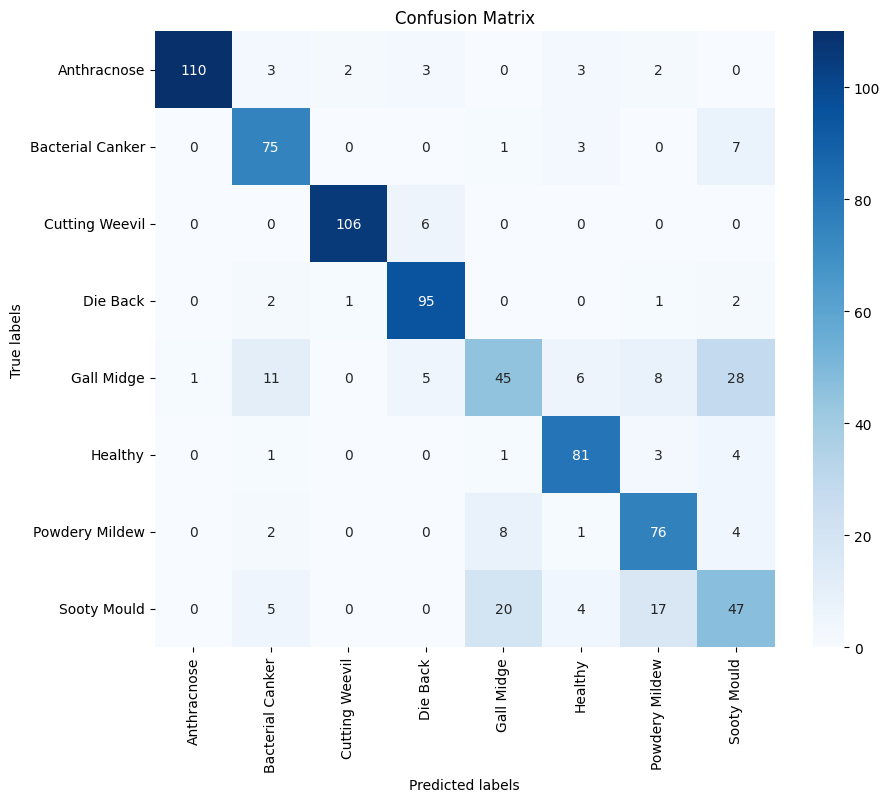

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba
y_pred = loaded_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
